In [1]:
# import the netCDF4 module
import netCDF4
import numpy as np
import datetime

In [2]:
# load the categorize file in the data folder
f = netCDF4.Dataset('data/20180624_leipzig_categorize.nc')

In [14]:
time = f.variables['time']
print(time)

dt = datetime.datetime(f.year, f.month, f.day)
dt

<class 'netCDF4._netCDF4.Variable'>
float32 time(time)
    axis: T
    units: hours since 2018-06-24 00:00:00 +0:00
    long_name: Time UTC
    standard_name: time
unlimited dimensions: 
current shape = (2879,)
filling on, default _FillValue of 9.969209968386869e+36 used


/home/tvogl/anaconda3/envs/larda_env/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  


datetime.datetime(2018, 6, 24, 0, 0)

In [17]:
a = np.arange(1, 12, 2)
print(a)

result = []
for i in a:
    result.append(str(i**2))

print(result)

print([str(i**2) for i in a])

[ 1  3  5  7  9 11]
['1', '9', '25', '49', '81', '121']
['1', '9', '25', '49', '81', '121']


In [18]:
# convert time to readable format
dt = datetime.datetime(f.year, f.month, f.day)
print(time)
dt_list = [dt + datetime.timedelta(seconds=t*3600) for t in time]

print(dt_list[:10])

/home/tvogl/anaconda3/envs/larda_env/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  This is separate from the ipykernel package so we can avoid doing imports until


<class 'netCDF4._netCDF4.Variable'>
float32 time(time)
    axis: T
    units: hours since 2018-06-24 00:00:00 +0:00
    long_name: Time UTC
    standard_name: time
unlimited dimensions: 
current shape = (2879,)
filling on, default _FillValue of 9.969209968386869e+36 used
[datetime.datetime(2018, 6, 24, 0, 0, 45, 1), datetime.datetime(2018, 6, 24, 0, 1, 15, 2), datetime.datetime(2018, 6, 24, 0, 1, 45), datetime.datetime(2018, 6, 24, 0, 2, 15, 5), datetime.datetime(2018, 6, 24, 0, 2, 45, 4), datetime.datetime(2018, 6, 24, 0, 3, 15, 2), datetime.datetime(2018, 6, 24, 0, 3, 45), datetime.datetime(2018, 6, 24, 0, 4, 14, 999998), datetime.datetime(2018, 6, 24, 0, 4, 44, 999996), datetime.datetime(2018, 6, 24, 0, 5, 14, 999995)]


In [26]:
f.variables

{'altitude': <class 'netCDF4._netCDF4.Variable'>
 float32 altitude()
     units: m
     long_name: Height of lidar above mean sea level
 unlimited dimensions: 
 current shape = ()
 filling on, default _FillValue of 9.969209968386869e+36 used,
 'latitude': <class 'netCDF4._netCDF4.Variable'>
 float32 latitude()
     units: degrees_north
     long_name: Latitude of site
     standard_name: latitude
 unlimited dimensions: 
 current shape = ()
 filling on, default _FillValue of 9.969209968386869e+36 used,
 'longitude': <class 'netCDF4._netCDF4.Variable'>
 float32 longitude()
     units: degrees_east
     long_name: Longitude of site
     standard_name: longitude
 unlimited dimensions: 
 current shape = ()
 filling on, default _FillValue of 9.969209968386869e+36 used,
 'time': <class 'netCDF4._netCDF4.Variable'>
 float32 time(time)
     axis: T
     units: hours since 2018-06-24 00:00:00 +0:00
     long_name: Time UTC
     standard_name: time
 unlimited dimensions: 
 current shape = (2879,)

In [28]:
# make variables more readable
for variable in f.variables.keys():
    print(variable)

# copy time and height values to local variables


altitude
latitude
longitude
time
height
model_height
rainrate
lwp
lwp_error
radar_frequency
lidar_wavelength
Z
v
width
ldr
Z_bias
Z_error
Z_sensitivity
beta
beta_bias
beta_error
lidar_depolarisation
temperature
pressure
specific_humidity
uwind
vwind
radar_gas_atten
radar_liquid_atten
sigma_zbeta
mean_zbeta
numgates_zbeta
category_bits
quality_bits


In [24]:
# using xarray
import xarray as xr

In [29]:
# load the categorize file
f = xr.open_mfdataset('data/20180624_leipzig_categorize.nc', combine='by_coords')

In [69]:
# conversions not needed any more
f

<xarray.Dataset>
Dimensions:               (height: 479, model_height: 21, time: 2879)
Coordinates:
  * time                  (time) datetime64[ns] 2018-06-24T00:00:45.000000670 ... 2018-06-24T23:59:44.996795654
  * height                (height) float32 304.0752 335.2544 ... 15768.959
  * model_height          (model_height) float32 289.1111 ... 16566.666
Data variables:
    altitude              float32 ...
    latitude              float32 ...
    longitude             float32 ...
    rainrate              (time) float32 dask.array<shape=(2879,), chunksize=(2879,)>
    lwp                   (time) float32 dask.array<shape=(2879,), chunksize=(2879,)>
    lwp_error             (time) float32 dask.array<shape=(2879,), chunksize=(2879,)>
    radar_frequency       float32 ...
    lidar_wavelength      float32 ...
    Z                     (time, height) float32 dask.array<shape=(2879, 479), chunksize=(2879, 479)>
    v                     (time, height) float32 dask.array<shape=(2879, 47

In [31]:
%matplotlib inline

In [34]:
# get air temperatures from xarray tutorial
airtemps = xr.tutorial.open_dataset("air_temperature")
airtemps.air

<xarray.DataArray 'air' (time: 2920, lat: 25, lon: 53)>
[3869000 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
Attributes:
    long_name:     4xDaily Air temperature at sigma level 995
    units:         degK
    precision:     2
    GRIB_id:       11
    GRIB_name:     TMP
    var_desc:      Air temperature
    dataset:       NMC Reanalysis
    level_desc:    Surface
    statistic:     Individual Obs
    parent_stat:   Other
    actual_range:  [185.16 322.1 ]

In [37]:
# convert to celsius
air = airtemps.air - 273.15

# copy attributes to get nice figure labels
air.attrs = airtemps.air.attrs
air.attrs['units'] = "deg C"

air

<xarray.DataArray 'air' (time: 2920, lat: 25, lon: 53)>
array([[[-31.949997, -30.649994, ..., -37.649994, -34.550003],
        [-29.350006, -28.649994, ..., -37.850006, -33.850006],
        ...,
        [ 22.75    ,  23.049988, ...,  22.75    ,  22.049988],
        [ 23.140015,  23.640015, ...,  23.640015,  23.450012]],

       [[-31.050003, -30.449997, ..., -39.550003, -37.350006],
        [-29.550003, -29.050003, ..., -40.649994, -37.449997],
        ...,
        [ 23.049988,  23.549988, ...,  22.350006,  21.950012],
        [ 23.140015,  24.049988, ...,  23.25    ,  23.450012]],

       ...,

       [[-27.36    , -28.36    , ..., -29.160004, -28.36    ],
        [-23.259995, -23.86    , ..., -30.660004, -28.86    ],
        ...,
        [ 23.140015,  24.040009, ...,  21.940002,  21.23999 ],
        [ 24.640015,  25.23999 , ...,  22.339996,  22.040009]],

       [[-28.059998, -28.86    , ..., -31.660004, -31.36    ],
        [-23.259995, -23.86    , ..., -32.86    , -31.460007],
    

In [39]:
# select one grid box

air1d = air.isel(lat=10, lon=10)
air1d

<xarray.DataArray 'air' (time: 2920)>
array([7.640015, 7.850006, 8.049988, ..., 9.339996, 9.339996, 9.540009],
      dtype=float32)
Coordinates:
    lat      float32 50.0
    lon      float32 225.0
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
Attributes:
    long_name:     4xDaily Air temperature at sigma level 995
    units:         deg C
    precision:     2
    GRIB_id:       11
    GRIB_name:     TMP
    var_desc:      Air temperature
    dataset:       NMC Reanalysis
    level_desc:    Surface
    statistic:     Individual Obs
    parent_stat:   Other
    actual_range:  [185.16 322.1 ]

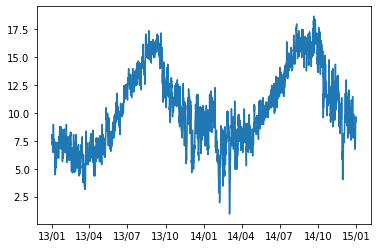

In [42]:
# plot time series
fig, ax = plt.subplots(1)
ax.plot(air1d.time, air1d)
ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%y/%m'))

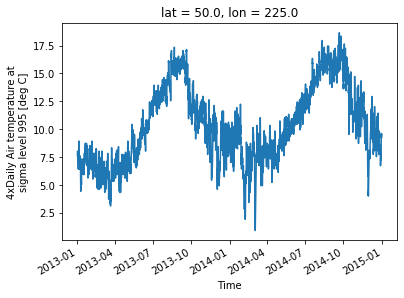

In [43]:
air1d.plot()

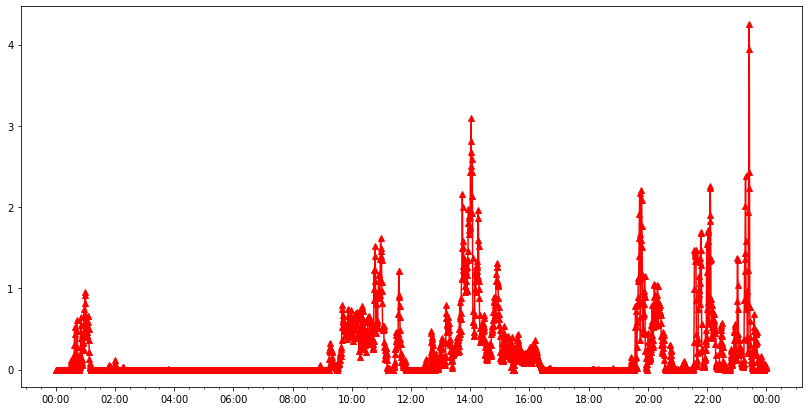

In [56]:
# plot with the rainrate

import matplotlib.pyplot as plt
import matplotlib

fig, ax = plt.subplots(1, figsize=(14, 7))
ax.plot(f.time, f.rainrate, 'r-^')

# some more visual candy
ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%H:%M'))
ax.xaxis.set_major_locator(matplotlib.dates.HourLocator(interval=2))
ax.xaxis.set_minor_locator(matplotlib.dates.MinuteLocator(byminute=[0,30]))
ax.yaxis.set_minor_locator(matplotlib.ticker.MultipleLocator(500))

In [66]:
# Some adjustments to the axis labels, ticks and fonts
# writing documentation

def load_xy_style(ax, xlabel='Time [UTC]', ylabel='Height [m]'):
    """
    Method that alters the appearance of labels on the x and y axes in place.
    
    Note: 
        If xlabel == 'Time [UTC]', the x axis set to major ticks every 3 hours
        and minor ticks every 30 minutes
    
    Args:
        ax (matplotlib.axis) :: axis that gets adjusted
        **xlabel (string) :: name of the x axis label
        **ylabel (srting) :: name of the y axis label

    """

    ax.set_xlabel(xlabel, fontweight='semibold', fontsize=15)
    ax.set_ylabel(ylabel, fontweight='semibold', fontsize=15)
    if xlabel == 'Time [UTC]':
        ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%H:%M'))
        ax.xaxis.set_major_locator(matplotlib.dates.HourLocator(interval=3))
        ax.xaxis.set_minor_locator(matplotlib.dates.MinuteLocator(byminute=[0,30]))
        ax.yaxis.set_minor_locator(matplotlib.ticker.MultipleLocator(500))
    ax.tick_params(axis='both', which='major', labelsize=14, width=3, length=4)
    ax.tick_params(axis='both', which='minor', width=2, length=3)

def load_cbar_style(cbar, cbar_label=''):
    """
   
    """
    cbar.ax.set_ylabel(cbar_label, fontweight='semibold', fontsize=15)
    cbar.ax.tick_params(axis='both', which='major', labelsize=14, width=2, length=4)

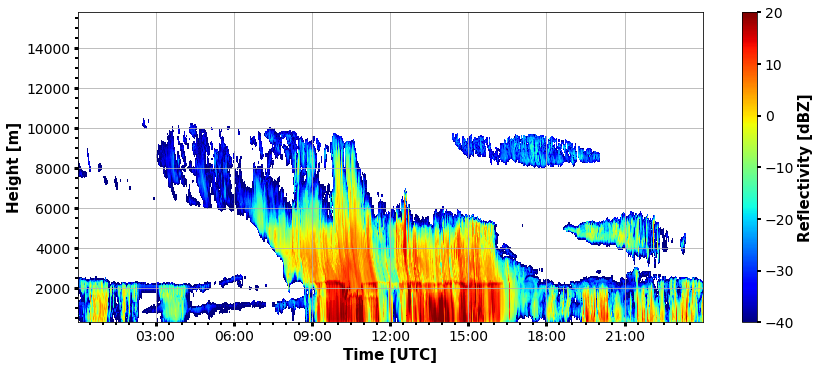

In [86]:
# reflectivity plot
Z = f['Z'].values
np.nanmin(Z)

fig, ax = plt.subplots(1, figsize=(14, 5.7))
pcmesh = ax.pcolormesh(f.time, f.height, np.transpose(Z), cmap='jet', vmin=-40, vmax=20)
cbar = fig.colorbar(pcmesh)

load_xy_style(ax)
load_cbar_style(cbar, cbar_label='Reflectivity [dBZ]')

ax.grid()

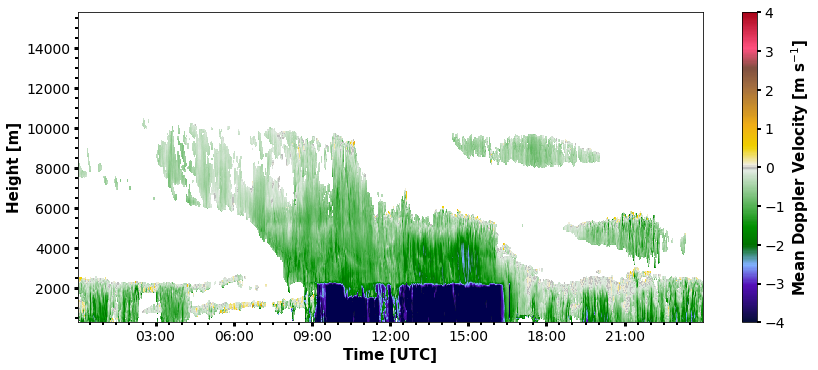

In [71]:
# similar for velocity
import Colormaps

v = f['v'].values

fig, ax = plt.subplots(1, figsize=(14, 5.7))
pcmesh = ax.pcolormesh(f.time, f.height, np.transpose(v), cmap=Colormaps.carbonne_map, vmin=-4, vmax=4)
cbar = fig.colorbar(pcmesh)

load_xy_style(ax)
load_cbar_style(cbar, cbar_label='Mean Doppler Velocity [m s$^{-1}$]')

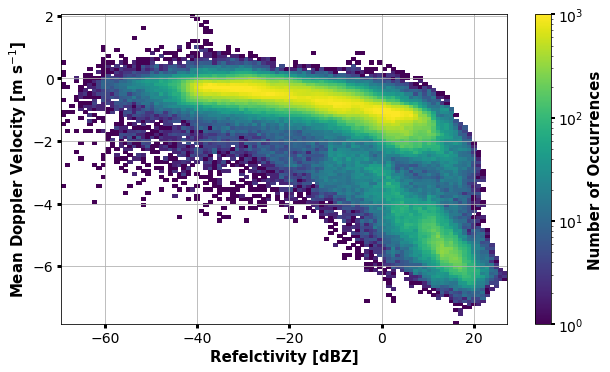

In [85]:
# 2d histogram
nan_mask = np.logical_or((np.isnan(Z.flatten())), (np.isnan(v.flatten())))

H, x_edges, y_edges = np.histogram2d(Z.flatten()[~nan_mask], v.flatten()[~nan_mask], bins=[100, 100])

fig, ax = plt.subplots(1, figsize=(10, 5.7))
pcmesh = ax.pcolormesh(x_edges, y_edges, np.transpose(H), norm=matplotlib.colors.LogNorm(1, vmax=1000))
cbar = fig.colorbar(pcmesh)

load_xy_style(ax, xlabel='Reflectivity [dBZ]', ylabel=r"Mean Doppler Velocity [m s$^{-1}$]")
load_cbar_style(cbar, cbar_label='Number of Occurrences')
ax.grid()

In [ ]:
# lidar beta and linear depolarization in one figure with two subplots


save figure: 20180624_beta_depol.png


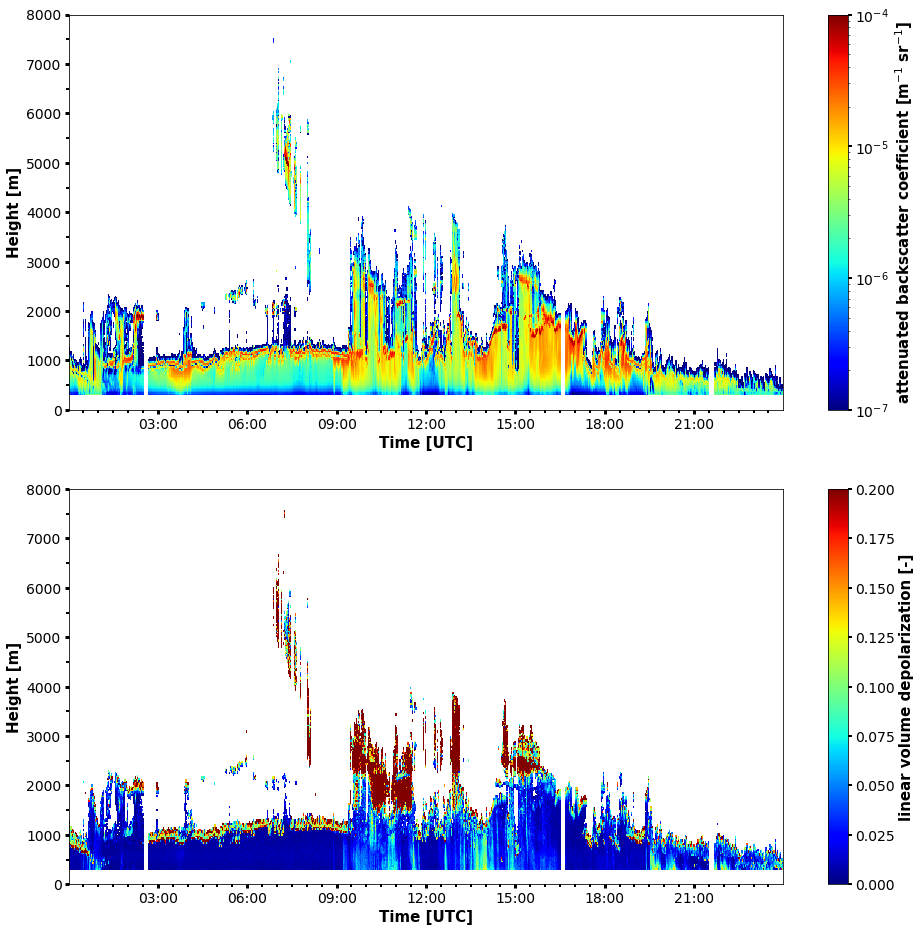

In [91]:
# lidar beta and linear depolarization in one figure with two subplots

beta, depol = f['beta'].values, f['lidar_depolarisation'].values

fig, (ax0, ax1) = plt.subplots(nrows=2, ncols=1, figsize=(16, 16))
ax0_pcmesh = ax0.pcolormesh(f.time, f.height, np.transpose(beta), cmap='jet', 
                              norm=matplotlib.colors.LogNorm(1.e-7, vmax=1.e-4))
ax0_cbar = fig.colorbar(ax0_pcmesh, ax=ax0)
load_xy_style(ax0)
load_cbar_style(ax0_cbar, cbar_label=r"attenuated backscatter coefficient [m$^{-1}$ sr$^{-1}$]")

depol = np.ma.masked_less_equal(depol, 0.0)    # mask values below (incl) 0 for better visibility
ax1_pcmesh = ax1.pcolormesh(f.time, f.height, np.transpose(depol), cmap='jet', vmin=0, vmax=0.2)
ax1_cbar = fig.colorbar(ax1_pcmesh, ax=ax1)
load_xy_style(ax1)
load_cbar_style(ax1_cbar, cbar_label=r"linear volume depolarization [-]")

ax0.set_ylim([0, 8000])
ax1.set_ylim([0, 8000])

import pandas as pd
datestring = pd.to_datetime(f.time[0].values).strftime("%Y%m%d")
savename = f'{datestring}_beta_depol.png'
print(f'save figure: {savename}')
fig.savefig(savename, dpi=250)